In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 156 µs (started: 2021-11-30 05:26:44 +00:00)


In [ ]:
from bing_image_downloader import  downloader
downloader.download("mobiles" , limit=30,output_dir = 'images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import  downloader
downloader.download("laptops" , limit=30,output_dir = 'images',adult_filter_off=True)

In [ ]:
from bing_image_downloader import  downloader
downloader.download("washing machine" , limit=30,output_dir = 'images',adult_filter_off=True)

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

targets = []
genere = []
flatten_data = []
datadir = '/content/images'
categories = ['mobiles','laptops','washing machine']

for cat in categories:
  nums = categories.index(cat)
  path = os.path.join(datadir,cat)
  for gen in os.listdir(path):
    gen_arr = imread(os.path.join(path,gen))
    targets.append(nums)

flatten_data = np.array(flatten_data)
targets = np.array(targets)
genere = np.array(genere)

time: 58.4 s (started: 2021-11-30 05:29:44 +00:00)


In [ ]:
flatten_data[0]

array([0.35294118, 0.41176471, 0.54117647, ..., 0.45882353, 0.51764706,
       0.63137255])

time: 11.5 ms (started: 2021-11-30 05:30:42 +00:00)


<BarContainer object of 3 artists>

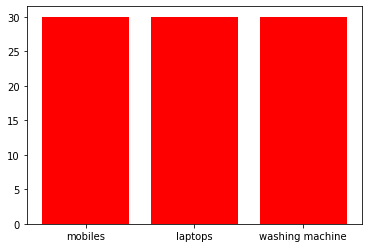

time: 164 ms (started: 2021-11-30 05:30:42 +00:00)


In [ ]:
unique,count = np.unique(targets,return_counts=True)
plt.bar(categories,count,color='r')

In [ ]:
# Split data into Training and Testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flatten_data,targets,
                                                    test_size=0.3,random_state=109)

time: 201 ms (started: 2021-11-30 05:30:42 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              { 'C': [1,10,100,1000],'kernel':['linear'] },
              { 'C': [1,10,100,1000],'gamma':[0.1,0.01,0.001,0.0001],'kernel':['rbf'] }
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000],
                          'gamma': [0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 35s (started: 2021-11-30 05:30:43 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 1, 2, 2, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 2,
       2, 0, 2, 0, 2])

time: 261 ms (started: 2021-11-30 05:32:18 +00:00)


In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

time: 4.23 ms (started: 2021-11-30 05:32:19 +00:00)


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6666666666666666

time: 6.91 ms (started: 2021-11-30 05:32:19 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[7, 1, 3],
       [0, 6, 0],
       [1, 4, 5]])

time: 6.77 ms (started: 2021-11-30 05:32:19 +00:00)


0.5555555555555556

time: 56.6 s (started: 2021-11-30 05:32:19 +00:00)


In [ ]:
import pickle #Predict new image
pickle.dump(clf,open('img_model.p','wb'))

time: 35.5 ms (started: 2021-11-30 05:33:15 +00:00)


In [ ]:
model = pickle.load(open('img_model.p','rb'))

time: 19.7 ms (started: 2021-11-30 05:33:15 +00:00)


Enter image URL from this categories(mobiles,laptop,washing machine)https://th.bing.com/th/id/R.7e599d65f7cb87c5152d1aac997dbaf0?rik=QK8vrDHq0lrUQQ&riu=http%3a%2f%2fvaluenomad.com%2fwp-content%2fuploads%2f2015%2f11%2fasus-f555ua.jpg&ehk=3ytGK16vX8OHdpDmQKBk%2f9o8VhWBvoovGrqOHoJOxBM%3d&risl=&pid=ImgRaw&r=0
(768, 1024, 3)
Predicted Output:laptops


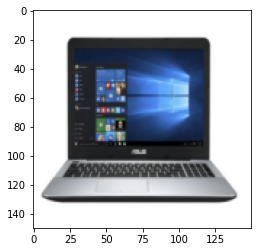

time: 54.7 s (started: 2021-11-30 06:01:32 +00:00)


In [ ]:
# Testing Output
flatten_data = []
url = input('Enter image URL from this categories(mobiles,laptop,washing machine)')
img = imread(url)
print(img.shape)
img_resized = resize(img,(150,150,3))
flatten_data.append(img_resized.flatten())
flatten_data = np.array(flatten_data)
plt.imshow(img_resized)
y_out = model.predict(flatten_data)
y_out = categories[y_out[0]]
print(f'Predicted Output:{y_out}')